In [4]:
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from splane import analyze_sys, pretty_print_bicuad_omegayq


Vi, Vo, Vx = sp.symbols("Vi, Vo, Vx")
R1, Z2, R3, R4, Z5, C2, C5 = sp.symbols("R1, Z2, R3, R4, Z5, C2, C5")

aa = sp.solve([  #despeja Vi y Vo en base a las ecuaciones (Me quedan en funcion de Vx)
                Vi/R1 -Vx*((1/R1) + (1/R3) + (1/R4) + (1/Z2)) + Vo/R4, 
                Vx + Vo*(R3/Z5)
                ], 
                [Vi, Vo])

transf_func = aa[Vo]/aa[Vi] #Aca defino mi transf_funct como el cociente entre Vo y Vi (Vo/Vi). Tambien es simbolica

tf9 = transf_func.subs(Z2, 1/(s*C2)) #reemplazo Y1 e Y2 por sus respectivos valores simbolicos
tf9 = tf9.subs(Z5, 1/(s*C5))

num, den = sp.fraction(sp.simplify(sp.expand(tf9)))  #simplificamos y separamos numerador y denominador


num = sp.Poly(num,s)
den = sp.Poly(den,s)


k = sp.simplify(num.LC() / den.LC()) #obtenemos la constante, y la simplificamos

num = num.monic() #hacemos que el numerador y denominador sean monicos
den = den.monic()

den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

tf9_final = sp.Mul(k,num/den, evaluate=False)

print('')
print('################')
print('# Ejercicio 9 #')
print('################')
display(tf9_final)
display(Math( r' \omega_o = ' + sp.latex(wo) ))




################
# Ejercicio 9 #
################


(-1/(C2*C5*R1*R3))/(s**2 + s*(R1*R3 + R1*R4 + R3*R4)/(C2*R1*R3*R4) + 1/(C2*C5*R3*R4))

<IPython.core.display.Math object>

Si evaluamos para:

$ R1=R3=R4=1\Omega $ 

$ C2 = 1F$ y $C5 = 0.01F$

In [23]:
tf9_val = tf9_final.subs({R1:1,R3:1,R4:1, C2:1, C5:0.01})
display(tf9_val)

-100.0/(s**2 + 3*s + 100.0)

<IPython.core.display.Math object>

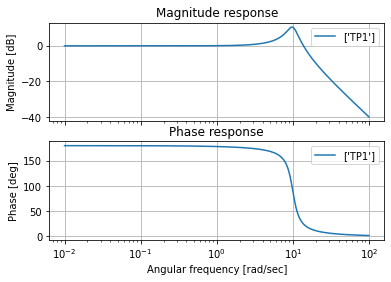

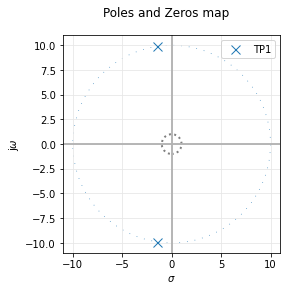

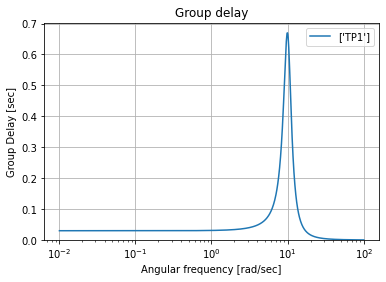

In [51]:
num = np.array([-100]) 
den = np.array([1, 3, 100])

pretty_print_bicuad_omegayq(num,den)

tf = sig.TransferFunction(num,den)
    
plt.close('all')
analyze_sys(tf, 'TP1')
